# Exploratory Data Analysis on Haberman Cancer Survival Dataset

The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#importing dataset
df=pd.read_csv("haberman.csv")

In [3]:
#printing the first five rows
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
#renaming the columns
df.rename(columns={"30":"Age","64":"Operation_Year","1":"Active_Lymph","1.1":"Survival_Status"},inplace=True)
df.columns

Index(['Age', 'Operation_Year', 'Active_Lymph', 'Survival_Status'], dtype='object')

### Attribute Information

Age: Age of patient at time of operation (numerical)

Operational_Year: Patient's year of operation (year - 1900, numerical)

Active_Lymph: Number of positive axillary nodes detected (numerical)

Servival_Status: Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [5]:
#getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                305 non-null int64
Operation_Year     305 non-null int64
Active_Lymph       305 non-null int64
Survival_Status    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


### Observations:
1 . The Dataset contains total 4 columns.

2 . Each rows contains 305 data points of integer type.

3 . There is not any missing or null value in the dataset.

4 . Survival Status has integer data so we have to convert it into categorical data to provide meaning.

In [6]:
# Converting Survival_Status_After_5yrs into categorical data

df["Survival_Status"]=df["Survival_Status"].map({1:"Yes",2:"No"})


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                305 non-null int64
Operation_Year     305 non-null int64
Active_Lymph       305 non-null int64
Survival_Status    305 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


## High level Statistics

In [9]:
# Description about Dataset

print(df.describe())

              Age  Operation_Year  Active_Lymph
count  305.000000      305.000000    305.000000
mean    52.531148       62.849180      4.036066
std     10.744024        3.254078      7.199370
min     30.000000       58.000000      0.000000
25%     44.000000       60.000000      0.000000
50%     52.000000       63.000000      1.000000
75%     61.000000       66.000000      4.000000
max     83.000000       69.000000     52.000000


### Observations:
1 . The minimum and maximum age of patient is 30 and 83 respectively.

2 . Maximum number of Active Lymph is 52.

3 . 25% of patients have 0 Active Lymph and 75% of patients have 4 Lymph.


Target Variable Distribution
Yes    224
No      81
Name: Survival_Status, dtype: int64

Target Variable Distribution After Normalization
Yes    0.734426
No     0.265574
Name: Survival_Status, dtype: float64


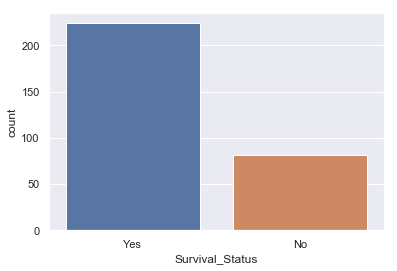

In [10]:
# Target Variable Distribution
print("\nTarget Variable Distribution")
print(df["Survival_Status"].value_counts())

# Normalize
print("\nTarget Variable Distribution After Normalization")
print(df["Survival_Status"].value_counts(normalize=True))

#countplot
sns.countplot(x='Survival_Status',data=df)
plt.show()

### Observations:

Since Yes = 73% and No ~ 27% the dataset is highly imbalanced.

## Objective
### To predict if the patient will survive after 5 years or not based on the patient's age, year of treatment and the number of active lymph nodes.

## Uni-Variate Analysis
#### to describe, summarize and find patterns in the single feature.

## 1. Probablity Distribution Function

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


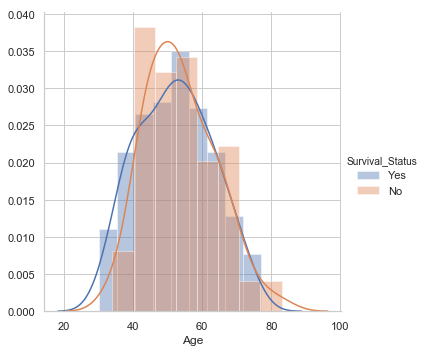

In [13]:
#pdf for age
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Survival_Status",height=5).map(sns.distplot,"Age").add_legend()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


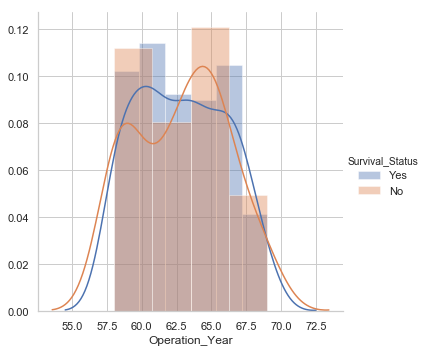

In [15]:
#pdf for Operation Year
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Survival_Status",height=5).map(sns.distplot,"Operation_Year").add_legend()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


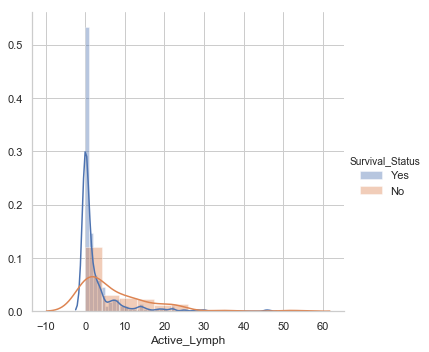

In [16]:
#pdf for Active_Lymph
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Survival_Status",height=5).map(sns.distplot,"Active_Lymph").add_legend()
plt.show()

## 2. Cumulative distribution function

In [19]:
survived= df[df['Survival_Status']=='Yes']
died= df[df['Survival_Status']=='No']

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


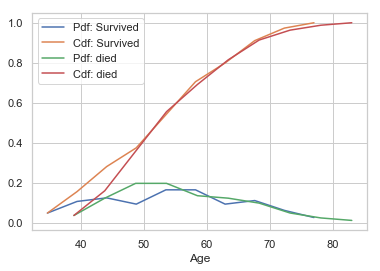

In [24]:
#2.1 Age

#survived
counts, bin_edges = np.histogram(survived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf Survived','Cdf Survived '])

#died
counts, bin_edges = np.histogram(died['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.legend(['Pdf: Survived','Cdf: Survived','Pdf: died','Cdf: died'])
plt.show();

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


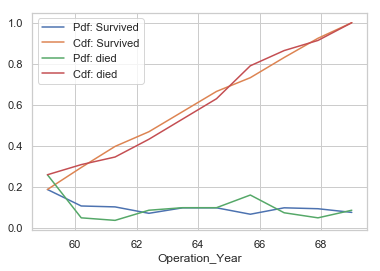

In [25]:
#2.2 Operation Year

#survived
counts, bin_edges = np.histogram(survived['Operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf Survived','Cdf Survived '])

#died
counts, bin_edges = np.histogram(died['Operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Operation_Year')
plt.legend(['Pdf: Survived','Cdf: Survived','Pdf: died','Cdf: died'])
plt.show();

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


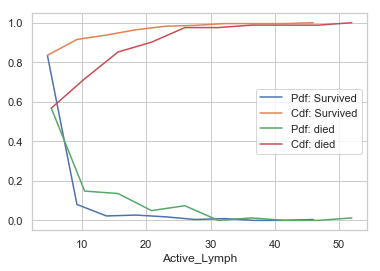

In [27]:
#2.3 Active_Lymph

#survived
counts, bin_edges = np.histogram(survived['Active_Lymph'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf Survived','Cdf Survived '])

#died
counts, bin_edges = np.histogram(died['Active_Lymph'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Active_Lymph')
plt.legend(['Pdf: Survived','Cdf: Survived','Pdf: died','Cdf: died'])
plt.show();

### Observation
1. Patients having less than 2 Lymph nodes have lower risk
2. Patients of age more than 34 years have higher risk involved

## Box Plot

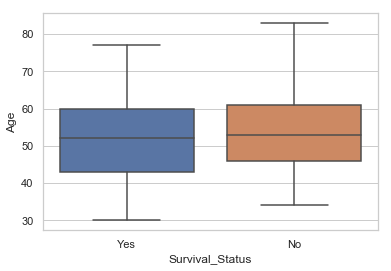

In [28]:
# Age
sns.boxplot(x="Survival_Status",y="Age",data=df)
plt.show()

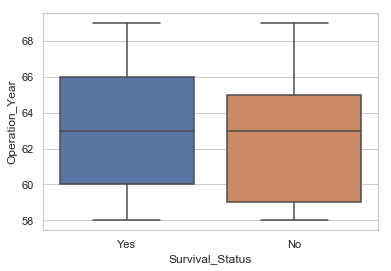

In [29]:
# Operation Year
sns.boxplot(x="Survival_Status",y="Operation_Year",data=df)
plt.show()

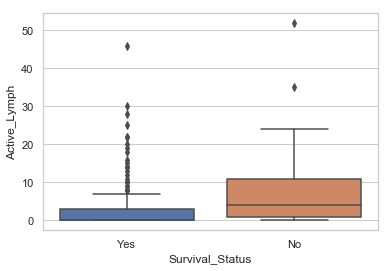

In [30]:
# Active Lympth
sns.boxplot(x="Survival_Status",y="Active_Lymph",data=df)
plt.show()

## Violin Plot

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


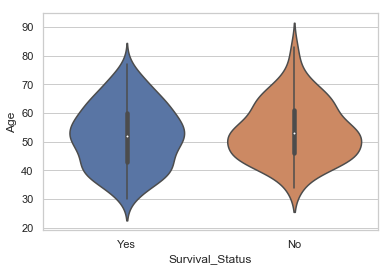

In [31]:
# Age
sns.violinplot(x="Survival_Status",y="Age",data=df)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


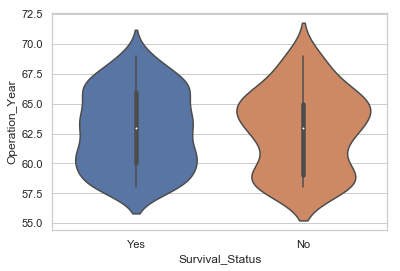

In [32]:
# Operation Year
sns.violinplot(x="Survival_Status",y="Operation_Year",data=df)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


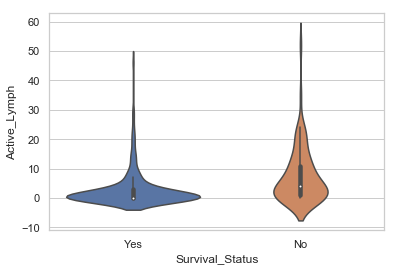

In [33]:
# Active Lympth
sns.violinplot(x="Survival_Status",y="Active_Lymph",data=df)
plt.show()

## Observations
1. Data is highly overlapped.
2. Only Active Lymph gives some intution about the distribution.

## Bi-Variate Analysis

### 2D Pair Plot

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


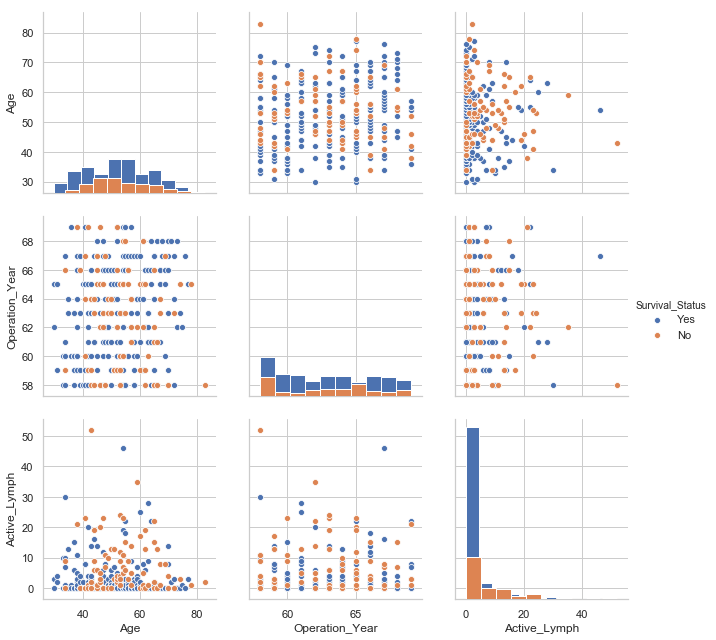

In [34]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Survival_Status",diag_kind="hist",height=3)
plt.show()

### Observations:
1. Data is highly overlapped.
2. By scattering the data points between Operation_Year and Active_Lymph, we can see the better seperation between the two clases than other scatter plots.

## Conclusion
#### 1. Data is very unbalanced (224 records of people surviving after  5 years but only 81 records of patient died before 5 years).
#### 2. None of the features except Active_Lymph gives any significant information about the distribution.
#### 3. Patients having less than 2 Lymph nodes have lower risk.
#### 4. Patients of age more than 34 years have higher risk involved.